# ZoneBudget Example

This notebook demonstrates how to use the `ZoneBudget` class to extract budget information from the cell by cell budget file using an array of zones.

First set the path and import the required packages. The flopy path doesn't have to be set if you install flopy from a binary installer. If you want to run this notebook, you have to set the path to your own flopy path.

In [1]:
import sys
from pathlib import Path
from tempfile import TemporaryDirectory

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

proj_root = Path.cwd().parent.parent

# run installed version of flopy or add local path
try:
    import flopy
except:
    sys.path.append(proj_root)
    import flopy

print(sys.version)
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(mpl.__version__))
print("pandas version: {}".format(pd.__version__))
print("flopy version: {}".format(flopy.__version__))

3.11.0 | packaged by conda-forge | (main, Jan 15 2023, 05:44:48) [Clang 14.0.6 ]
numpy version: 1.24.2
matplotlib version: 3.6.3
pandas version: 1.5.3
flopy version: 3.3.7


In [2]:
# temporary workspace
temp_dir = TemporaryDirectory()
workspace = Path(temp_dir.name)

# Set path to example datafiles
loadpth = proj_root / "examples" / "data" / "zonbud_examples"
cbc_f = loadpth / "freyberg.gitcbc"

### Read File Containing Zones
Using the `ZoneBudget.read_zone_file()` utility, we can import zonebudget-style array files.

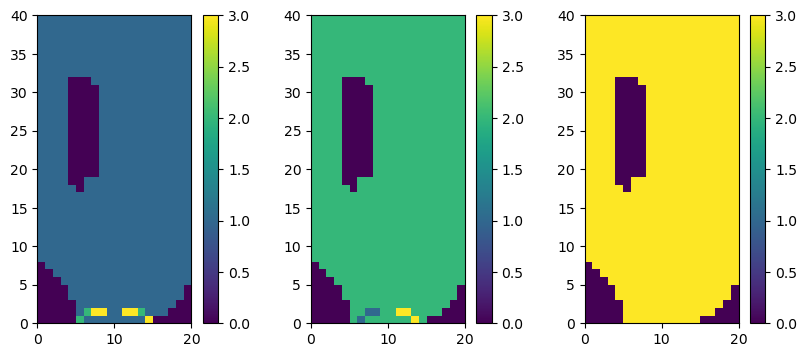

In [3]:
from flopy.utils import ZoneBudget

zone_file = loadpth / "zonef_mlt.zbr"
zon = ZoneBudget.read_zone_file(zone_file)
nlay, nrow, ncol = zon.shape

fig = plt.figure(figsize=(10, 4))

for lay in range(nlay):
    ax = fig.add_subplot(1, nlay, lay + 1)
    im = ax.pcolormesh(zon[lay, ::-1, :])
    cbar = plt.colorbar(im)
    plt.gca().set_aspect("equal")

plt.show()

### Extract Budget Information from ZoneBudget Object

At the core of the `ZoneBudget` object is a numpy structured array. The class provides some wrapper functions to help us interogate the array and save it to disk.

In [4]:
# Create a ZoneBudget object and get the budget record array
zb = flopy.utils.ZoneBudget(cbc_f, zon, kstpkper=(0, 1096))
zb.get_budget()

array([(1097., 0, 1096, 'FROM_STORAGE',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
       (1097., 0, 1096, 'FROM_CONSTANT_HEAD',  0., 0.0000000e+00, 2.3156659e+02, 8.6217201e+01),
       (1097., 0, 1096, 'FROM_WELLS',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
       (1097., 0, 1096, 'FROM_DRAINS',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
       (1097., 0, 1096, 'FROM_RECHARGE',  0., 5.1455815e+03, 1.4936376e+01, 2.9872751e+01),
       (1097., 0, 1096, 'FROM_ZONE_0',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
       (1097., 0, 1096, 'FROM_ZONE_1',  0., 0.0000000e+00, 3.4751235e+03, 1.3860045e+02),
       (1097., 0, 1096, 'FROM_ZONE_2',  0., 3.2693188e+03, 0.0000000e+00, 1.7646553e+03),
       (1097., 0, 1096, 'FROM_ZONE_3',  0., 1.9218604e+02, 1.5280482e+03, 0.0000000e+00),
       (1097., 0, 1096, 'TOTAL_IN',  0., 8.6070859e+03, 5.2496748e+03, 2.0193457e+03),
       (1097., 0, 1096, 'TO_STORAGE',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
     

In [5]:
# Get a list of the unique budget record names
zb.get_record_names()

array(['FROM_CONSTANT_HEAD', 'FROM_DRAINS', 'FROM_RECHARGE',
       'FROM_STORAGE', 'FROM_WELLS', 'FROM_ZONE_0', 'FROM_ZONE_1',
       'FROM_ZONE_2', 'FROM_ZONE_3', 'IN-OUT', 'PERCENT_DISCREPANCY',
       'TOTAL_IN', 'TOTAL_OUT', 'TO_CONSTANT_HEAD', 'TO_DRAINS',
       'TO_RECHARGE', 'TO_STORAGE', 'TO_WELLS', 'TO_ZONE_0', 'TO_ZONE_1',
       'TO_ZONE_2', 'TO_ZONE_3'], dtype='<U50')

In [6]:
# Look at a subset of fluxes
names = ["FROM_RECHARGE", "FROM_ZONE_1", "FROM_ZONE_3"]
zb.get_budget(names=names)

array([(1097., 0, 1096, 'FROM_RECHARGE', 0., 5145.5815 ,   14.936376,  29.872751),
       (1097., 0, 1096, 'FROM_ZONE_1', 0.,    0.     , 3475.1235  , 138.60045 ),
       (1097., 0, 1096, 'FROM_ZONE_3', 0.,  192.18604, 1528.0482  ,   0.      )],
      dtype=[('totim', '<f4'), ('time_step', '<i4'), ('stress_period', '<i4'), ('name', '<U50'), ('ZONE_0', '<f4'), ('ZONE_1', '<f4'), ('ZONE_2', '<f4'), ('ZONE_3', '<f4')])

In [7]:
# Look at fluxes in from zone 2
names = ["FROM_RECHARGE", "FROM_ZONE_1", "FROM_ZONE_3"]
zones = ["ZONE_2"]
zb.get_budget(names=names, zones=zones)

array([(1097., 0, 1096, 'FROM_RECHARGE',   14.936376),
       (1097., 0, 1096, 'FROM_ZONE_1', 3475.1235  ),
       (1097., 0, 1096, 'FROM_ZONE_3', 1528.0482  )],
      dtype={'names': ['totim', 'time_step', 'stress_period', 'name', 'ZONE_2'], 'formats': ['<f4', '<i4', '<i4', '<U50', '<f4'], 'offsets': [0, 4, 8, 12, 220], 'itemsize': 228})

In [8]:
# Look at all of the mass-balance records
names = ["TOTAL_IN", "TOTAL_OUT", "IN-OUT", "PERCENT_DISCREPANCY"]
zb.get_budget(names=names)

array([(1097., 0, 1096, 'TOTAL_IN',  0., 8.6070859e+03, 5.249675e+03, 2.0193457e+03),
       (1097., 0, 1096, 'TOTAL_OUT',  0., 8.6070723e+03, 5.249676e+03, 2.0193480e+03),
       (1097., 0, 1096, 'IN-OUT',  0., 1.3671875e-02, 9.765625e-04, 2.3193359e-03),
       (1097., 0, 1096, 'PERCENT_DISCREPANCY', nan, 1.5884454e-04, 1.860234e-05, 1.1485574e-04)],
      dtype=[('totim', '<f4'), ('time_step', '<i4'), ('stress_period', '<i4'), ('name', '<U50'), ('ZONE_0', '<f4'), ('ZONE_1', '<f4'), ('ZONE_2', '<f4'), ('ZONE_3', '<f4')])

### Convert Units
The `ZoneBudget` class supports the use of mathematical operators and returns a new copy of the object.

In [9]:
cmd = flopy.utils.ZoneBudget(cbc_f, zon, kstpkper=(0, 0))
cfd = cmd / 35.3147
inyr = (cfd / (250 * 250)) * 365 * 12

cmdbud = cmd.get_budget()
cfdbud = cfd.get_budget()
inyrbud = inyr.get_budget()

names = ["FROM_RECHARGE"]
rowidx = np.in1d(cmdbud["name"], names)
colidx = "ZONE_1"

print("{:,.1f} cubic meters/day".format(cmdbud[rowidx][colidx][0]))
print("{:,.1f} cubic feet/day".format(cfdbud[rowidx][colidx][0]))
print("{:,.1f} inches/year".format(inyrbud[rowidx][colidx][0]))

6,222.7 cubic meters/day
176.2 cubic feet/day
12.3 inches/year


In [10]:
cmd is cfd

False

### Alias Names
A dictionary of {zone: "alias"} pairs can be passed to replace the typical "ZONE_X" fieldnames of the `ZoneBudget` structured array with more descriptive names.

In [11]:
aliases = {1: "SURF", 2: "CONF", 3: "UFA"}
zb = flopy.utils.ZoneBudget(cbc_f, zon, totim=[1097.0], aliases=aliases)
zb.get_budget()

array([(1097., 0, 1096, 'FROM_STORAGE',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
       (1097., 0, 1096, 'FROM_CONSTANT_HEAD',  0., 0.0000000e+00, 2.3156659e+02, 8.6217201e+01),
       (1097., 0, 1096, 'FROM_WELLS',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
       (1097., 0, 1096, 'FROM_DRAINS',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
       (1097., 0, 1096, 'FROM_RECHARGE',  0., 5.1455815e+03, 1.4936376e+01, 2.9872751e+01),
       (1097., 0, 1096, 'FROM_ZONE_0',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
       (1097., 0, 1096, 'FROM_SURF',  0., 0.0000000e+00, 3.4751235e+03, 1.3860045e+02),
       (1097., 0, 1096, 'FROM_CONF',  0., 3.2693188e+03, 0.0000000e+00, 1.7646553e+03),
       (1097., 0, 1096, 'FROM_UFA',  0., 1.9218604e+02, 1.5280482e+03, 0.0000000e+00),
       (1097., 0, 1096, 'TOTAL_IN',  0., 8.6070859e+03, 5.2496748e+03, 2.0193457e+03),
       (1097., 0, 1096, 'TO_STORAGE',  0., 0.0000000e+00, 0.0000000e+00, 0.0000000e+00),
       (1097

### Return the Budgets as a Pandas DataFrame
Set `kstpkper` and `totim` keyword args to `None` (or omit) to return all times.
The `get_dataframes()` method will return a DataFrame multi-indexed on `totim` and `name`.

In [12]:
aliases = {1: "SURF", 2: "CONF", 3: "UFA"}
times = list(range(1092, 1097 + 1))
zb = flopy.utils.ZoneBudget(cbc_f, zon, totim=times, aliases=aliases)
zb.get_dataframes()

ZONE_0         SURF         CONF          UFA
totim  name                                                              
1092.0 FROM_STORAGE            0.0   393.480286   230.476242   228.273621
       FROM_CONSTANT_HEAD      0.0     0.000000    13.225761     5.042325
       FROM_WELLS              0.0     0.000000     0.000000     0.000000
       FROM_DRAINS             0.0     0.000000     0.000000     0.000000
       FROM_RECHARGE           0.0  6018.483887    17.470200    34.940399
...                            ...          ...          ...          ...
1097.0 TO_CONF                 0.0  3475.123535     0.000000  1528.048218
       TO_UFA                  0.0   138.600449  1764.655273     0.000000
       TOTAL_OUT               0.0  8607.072266  5249.675781  2019.348022
       IN-OUT                  0.0     0.013672     0.000977     0.002319
       PERCENT_DISCREPANCY     NaN     0.000159     0.000019     0.000115

[132 rows x 4 columns]

Slice the multi-index dataframe to retrieve a subset of the budget.
NOTE: We can pass "names" directly to the `get_dataframes()` method to return a subset of reocrds. By omitting the `"FROM_"` or `"TO_"` prefix we get both.

In [13]:
dateidx1 = 1095.0
dateidx2 = 1097.0
names = ["FROM_RECHARGE", "TO_WELLS", "CONSTANT_HEAD"]
zones = ["SURF", "CONF"]
df = zb.get_dataframes(names=names)
df.loc[(slice(dateidx1, dateidx2), slice(None)), :][zones]

SURF        CONF
totim  name                                       
1095.0 FROM_CONSTANT_HEAD     0.000000   14.531923
       FROM_RECHARGE       5010.149414   14.543249
       TO_CONSTANT_HEAD     664.912598  493.175781
       TO_WELLS             794.582886    0.000000
1096.0 FROM_CONSTANT_HEAD     0.000000    6.501888
       FROM_RECHARGE       6115.663086   17.752289
       TO_CONSTANT_HEAD     690.230591  511.618652
       TO_WELLS            1373.782715    0.000000
1097.0 FROM_CONSTANT_HEAD     0.000000  231.566589
       FROM_RECHARGE       5145.581543   14.936376
       TO_CONSTANT_HEAD     230.548355  215.701508
       TO_WELLS            4762.799805    0.000000

Look at pumpage (`TO_WELLS`) as a percentage of recharge (`FROM_RECHARGE`)

In [14]:
dateidx1 = 1095.0
dateidx2 = 1097.0
zones = ["SURF"]

# Pull out the individual records of interest
rech = df.loc[(slice(dateidx1, dateidx2), ["FROM_RECHARGE"]), :][zones]
pump = df.loc[(slice(dateidx1, dateidx2), ["TO_WELLS"]), :][zones]

# Remove the "record" field from the index so we can
# take the difference of the two DataFrames
rech = rech.reset_index()
rech = rech.set_index(["totim"])
rech = rech[zones]
pump = pump.reset_index()
pump = pump.set_index(["totim"])
pump = pump[zones] * -1

# Compute pumping as a percentage of recharge
(pump / rech) * 100.0

,SURF
totim,
1095.0,-15.859466
1096.0,-22.463348
1097.0,-92.560966


Pass `start_datetime` and `timeunit` keyword arguments to return a dataframe with a datetime multi-index

In [15]:
dateidx1 = pd.Timestamp("1972-12-29")
dateidx2 = pd.Timestamp("1972-12-30")
names = ["FROM_RECHARGE", "TO_WELLS", "CONSTANT_HEAD"]
zones = ["SURF", "CONF"]
df = zb.get_dataframes(start_datetime="1970-01-01", timeunit="D", names=names)
df.loc[(slice(dateidx1, dateidx2), slice(None)), :][zones]

SURF        CONF
datetime   name                                       
1972-12-29 FROM_CONSTANT_HEAD     0.000000   16.905813
           FROM_RECHARGE       4203.679199   12.202263
           TO_CONSTANT_HEAD     655.814514  487.094849
           TO_WELLS            1930.483154    0.000000
1972-12-30 FROM_CONSTANT_HEAD     0.000000   18.877954
           FROM_RECHARGE       4047.502441   11.748919
           TO_CONSTANT_HEAD     650.441589  482.853638
           TO_WELLS            1279.166382    0.000000

Pass `index_key` to indicate which fields to use in the multi-index (default is "totim"; valid keys are "totim" and "kstpkper")

In [16]:
df = zb.get_dataframes(index_key="kstpkper")
df.head()

ZONE_0         SURF        CONF  \
time_step stress_period name                                                  
0         1091          FROM_STORAGE           0.0   393.480286  230.476242   
                        FROM_CONSTANT_HEAD     0.0     0.000000   13.225761   
                        FROM_WELLS             0.0     0.000000    0.000000   
                        FROM_DRAINS            0.0     0.000000    0.000000   
                        FROM_RECHARGE          0.0  6018.483887   17.470200   

                                                   UFA  
time_step stress_period name                            
0         1091          FROM_STORAGE        228.273621  
                        FROM_CONSTANT_HEAD    5.042325  
                        FROM_WELLS            0.000000  
                        FROM_DRAINS           0.000000  
                        FROM_RECHARGE        34.940399

### Write Budget Output to CSV

We can write the resulting recarray to a csv file with the `.to_csv()` method of the `ZoneBudget` object.

In [17]:
zb = flopy.utils.ZoneBudget(cbc_f, zon, kstpkper=[(0, 0), (0, 1096)])
f_out = workspace / "Example_output.csv"
zb.to_csv(f_out)

# Read the file in to see the contents
try:
    import pandas as pd

    print(pd.read_csv(f_out).to_string(index=False))
except:
    with open(f_out, "r") as f:
        for line in f.readlines():
            print("\t".join(line.split(",")))

 totim  time_step  stress_period                name  ZONE_0      ZONE_1      ZONE_2      ZONE_3
   1.0          0              0        FROM_STORAGE     0.0    0.000000    0.000000    0.000000
   1.0          0              0  FROM_CONSTANT_HEAD     0.0    0.000000    0.000000    0.000000
   1.0          0              0          FROM_WELLS     0.0    0.000000    0.000000    0.000000
   1.0          0              0         FROM_DRAINS     0.0    0.000000    0.000000    0.000000
   1.0          0              0       FROM_RECHARGE     0.0 6222.673300   18.062912   36.125824
   1.0          0              0         FROM_ZONE_0     0.0    0.000000    0.000000    0.000000
   1.0          0              0         FROM_ZONE_1     0.0    0.000000 4275.257300  491.945070
   1.0          0              0         FROM_ZONE_2     0.0 2744.821800    0.000000 2115.654000
   1.0          0              0         FROM_ZONE_3     0.0  451.545720 1215.952300    0.000000
   1.0          0             

### Net Budget
Using the "net" keyword argument, we can request a net budget for each zone/record name or for a subset of zones and record names. Note that we can identify the record names we want without the added `"_IN"` or `"_OUT"` string suffix.

In [18]:
zon = np.ones((nlay, nrow, ncol), int)
zon[1, :, :] = 2
zon[2, :, :] = 3

aliases = {1: "SURF", 2: "CONF", 3: "UFA"}
times = list(range(1092, 1097 + 1))
zb = flopy.utils.ZoneBudget(cbc_f, zon, totim=times, aliases=aliases)
zb.get_budget(names=["STORAGE", "WELLS"], zones=["SURF", "UFA"], net=True)

array([(1092., 0, 1091, 'STORAGE',  -386.15085, -425.65155),
       (1092., 0, 1091, 'WELLS', -2829.812  ,    0.     ),
       (1093., 0, 1092, 'STORAGE',   -12.50354, -151.3594 ),
       (1093., 0, 1092, 'WELLS', -1930.4832 ,    0.     ),
       (1094., 0, 1093, 'STORAGE',  -198.92935, -270.8744 ),
       (1094., 0, 1093, 'WELLS', -1279.1664 ,    0.     ),
       (1095., 0, 1094, 'STORAGE',  -718.4885 , -604.8537 ),
       (1095., 0, 1094, 'WELLS',  -794.5829 ,    0.     ),
       (1096., 0, 1095, 'STORAGE',  -855.1075 , -622.88477),
       (1096., 0, 1095, 'WELLS', -1373.7827 ,    0.     ),
       (1097., 0, 1096, 'STORAGE',     0.     ,    0.     ),
       (1097., 0, 1096, 'WELLS', -4762.8    ,    0.     )],
      dtype={'names': ['totim', 'time_step', 'stress_period', 'name', 'SURF', 'UFA'], 'formats': ['<f4', '<i4', '<i4', '<U50', '<f4', '<f4'], 'offsets': [0, 4, 8, 12, 212, 220], 'itemsize': 224})

In [19]:
df = zb.get_dataframes(
    names=["STORAGE", "WELLS"], zones=["SURF", "UFA"], net=True
)
df.head(6)

SURF         UFA
totim  name                            
1092.0 STORAGE  -386.150848 -425.651550
       WELLS   -2829.812012    0.000000
1093.0 STORAGE   -12.503540 -151.359406
       WELLS   -1930.483154    0.000000
1094.0 STORAGE  -198.929352 -270.874390
       WELLS   -1279.166382    0.000000

## Plot Budget Components
The following is a function that can be used to better visualize the budget components using matplotlib.

In [20]:
def tick_label_formatter_comma_sep(x, pos):
    return "{:,.0f}".format(x)


def volumetric_budget_bar_plot(values_in, values_out, labels, **kwargs):
    if "ax" in kwargs:
        ax = kwargs.pop("ax")
    else:
        ax = plt.gca()

    x_pos = np.arange(len(values_in))
    rects_in = ax.bar(x_pos, values_in, align="center", alpha=0.5)

    x_pos = np.arange(len(values_out))
    rects_out = ax.bar(x_pos, values_out, align="center", alpha=0.5)

    plt.xticks(list(x_pos), labels)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(tick_label_formatter_comma_sep)
    )

    ymin, ymax = ax.get_ylim()
    if ymax != 0:
        if abs(ymin) / ymax < 0.33:
            ymin = -(ymax * 0.5)
        else:
            ymin *= 1.35
    else:
        ymin *= 1.35
    plt.ylim([ymin, ymax * 1.25])

    for i, rect in enumerate(rects_in):
        label = "{:,.0f}".format(values_in[i])
        height = values_in[i]
        x = rect.get_x() + rect.get_width() / 2
        y = height + (0.02 * ymax)
        vertical_alignment = "bottom"
        horizontal_alignment = "center"
        ax.text(
            x,
            y,
            label,
            ha=horizontal_alignment,
            va=vertical_alignment,
            rotation=90,
        )

    for i, rect in enumerate(rects_out):
        label = "{:,.0f}".format(values_out[i])
        height = values_out[i]
        x = rect.get_x() + rect.get_width() / 2
        y = height + (0.02 * ymin)
        vertical_alignment = "top"
        horizontal_alignment = "center"
        ax.text(
            x,
            y,
            label,
            ha=horizontal_alignment,
            va=vertical_alignment,
            rotation=90,
        )

    # horizontal line indicating zero
    ax.plot(
        [
            rects_in[0].get_x() - rects_in[0].get_width() / 2,
            rects_in[-1].get_x() + rects_in[-1].get_width(),
        ],
        [0, 0],
        "k",
    )

    return rects_in, rects_out

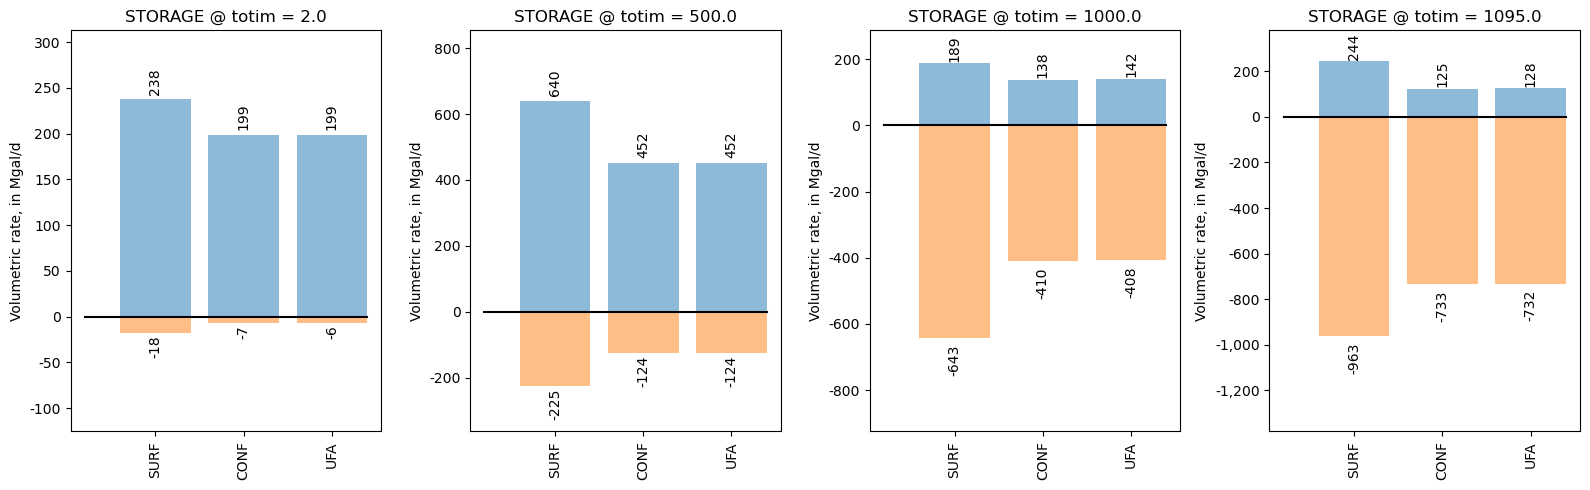

In [21]:
fig = plt.figure(figsize=(16, 5))

times = [2.0, 500.0, 1000.0, 1095.0]

for idx, t in enumerate(times):
    ax = fig.add_subplot(1, len(times), idx + 1)

    zb = flopy.utils.ZoneBudget(
        cbc_f, zon, kstpkper=None, totim=t, aliases=aliases
    )

    recname = "STORAGE"
    values_in = zb.get_dataframes(names="FROM_{}".format(recname)).T.squeeze()
    values_out = (
        zb.get_dataframes(names="TO_{}".format(recname)).T.squeeze() * -1
    )
    labels = values_in.index.tolist()

    rects_in, rects_out = volumetric_budget_bar_plot(
        values_in, values_out, labels, ax=ax
    )

    plt.ylabel("Volumetric rate, in Mgal/d")
    plt.title("{} @ totim = {}".format(recname, t))

plt.tight_layout()
plt.show()

# Zonebudget for Modflow 6 (`ZoneBudget6`)

This section shows how to build and run a Zonebudget when working with a MODFLOW 6 model. 

First let's load a model

In [22]:
mf6_exe = "mf6"
zb6_exe = "zbud6"

sim_ws = proj_root / "examples" / "data" / "mf6-freyberg"
cpth = workspace / "zbud6"
cpth.mkdir()

sim = flopy.mf6.MFSimulation.load(sim_ws=sim_ws, exe_name=mf6_exe)
sim.simulation_data.mfpath.set_sim_path(cpth)
sim.write_simulation()
success, buff = sim.run_simulation(silent=True, report=True)
assert success, "Failed to run"
for line in buff:
    print(line)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package oc...
    loading package npf...
    loading package sto...
    loading package chd...
    loading package riv...
    loading package wel...
    loading package rch...
  loading solution package freyberg...
writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package freyberg...
  writing model freyberg...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package sto...
    writing package chd_0...
    writing package riv_0...
    writing package wel_0...
    writing package rch_0...


                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.3.0 03/08/2022

   MODFLOW 6 compiled Mar 10 2022 13:40:29 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.5.0
                             Build 20211109_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthoriz

### Use the the `.output` model attribute to create a zonebudget model

The `.output` attribute allows the user to access model output and create zonebudget models easily. The user only needs to pass in a zone array to create a zonebudget model!

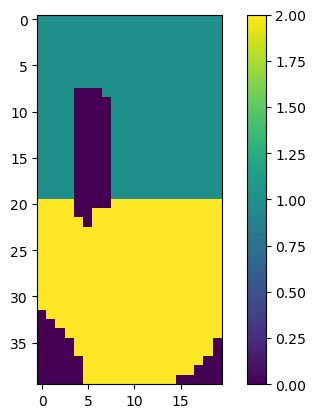

In [23]:
# let's get our idomain array from the model, split it into two zones, and use it as a zone array
ml = sim.get_model("freyberg")
zones = ml.modelgrid.idomain
zones[0, 20:] = np.where(zones[0, 20:] != 0, 2, 0)

plt.imshow(zones[0])
plt.colorbar();

In [24]:
# now let's build a zonebudget model and run it!
zonbud = ml.output.zonebudget(zones)
zonbud.change_model_ws(cpth)
zonbud.write_input()
success, buff = zonbud.run_model(exe_name=zb6_exe, silent=True)

### Getting the zonebudget output

We can then get the output as a recarray using the `.get_budget()` method or as a pandas dataframe using the `.get_dataframes()` method.

In [25]:
zonbud.get_budget()

rec.array([(10., 0, 0, 'STO_SS_IN', 0.        , 0.        ),
           (10., 0, 0, 'STO_SY_IN', 0.        , 0.        ),
           (10., 0, 0, 'DATA_SPDIS_IN', 0.        , 0.        ),
           (10., 0, 0, 'WEL_IN', 0.        , 0.        ),
           (10., 0, 0, 'RIV_IN', 0.00419403, 0.        ),
           (10., 0, 0, 'RCHA_IN', 0.0353    , 0.0342    ),
           (10., 0, 0, 'CHD_IN', 0.        , 0.00017814),
           (10., 0, 0, 'STO_SS_OUT', 0.        , 0.        ),
           (10., 0, 0, 'STO_SY_OUT', 0.        , 0.        ),
           (10., 0, 0, 'DATA_SPDIS_OUT', 0.        , 0.        ),
           (10., 0, 0, 'WEL_OUT', 0.0162    , 0.00585   ),
           (10., 0, 0, 'RIV_OUT', 0.02102198, 0.02637233),
           (10., 0, 0, 'RCHA_OUT', 0.        , 0.        ),
           (10., 0, 0, 'CHD_OUT', 0.        , 0.00442785),
           (10., 0, 0, 'FROM_ZONE_0', 0.        , 0.        ),
           (10., 0, 0, 'FROM_ZONE_1', 0.        , 0.00405829),
           (10., 0, 0, 'FRO

In [26]:
# get the net flux using net=True flag
zonbud.get_dataframes(net=True)

ZONE_1    ZONE_2
totim name                          
10.0  STO_SS      0.000000  0.000000
      STO_SY      0.000000  0.000000
      DATA_SPDIS  0.000000  0.000000
      WEL        -0.016200 -0.005850
      RIV        -0.016828 -0.026372
      RCHA        0.035300  0.034200
      CHD         0.000000 -0.004250
      ZONE_0      0.000000  0.000000
      ZONE_1      0.000000  0.002272
      ZONE_2     -0.002272  0.000000

In [27]:
# we can also pivot the data into a spreadsheet like format
zonbud.get_dataframes(net=True, pivot=True)

,totim,kper,kstp,zone,CHD,DATA_SPDIS,RCHA,RIV,STO_SS,STO_SY,WEL,ZONE_0,ZONE_1,ZONE_2
0,10.0,0,0,1,0.00000,0.0,0.0353,-0.016828,0.0,0.0,-0.01620,0.0,0.000000,-0.002272
1,10.0,0,0,2,-0.00425,0.0,0.0342,-0.026372,0.0,0.0,-0.00585,0.0,0.002272,0.000000


In [28]:
# or get a volumetric budget by supplying modeltime
mt = ml.modeltime

# budget recarray must be pivoted to get volumetric budget!
zonbud.get_volumetric_budget(
    mt, recarray=zonbud.get_budget(net=True, pivot=True)
)

,totim,kper,kstp,zone,CHD,DATA_SPDIS,RCHA,RIV,STO_SS,STO_SY,WEL,ZONE_0,ZONE_1,ZONE_2
0,10.0,0,0,1,0.000000,0.0,0.353,-0.168280,0.0,0.0,-0.1620,0.0,0.000000,-0.022721
1,10.0,0,0,2,-0.042497,0.0,0.342,-0.263723,0.0,0.0,-0.0585,0.0,0.022721,0.000000


In [29]:
try:
    # ignore PermissionError on Windows
    temp_dir.cleanup()
except:
    pass